# Computational Bionics | Exercise 1: Modeling of the angle sensor

In [1]:
import numpy as np
from numpy import sin
import pandas as pd
import matplotlib.pyplot as plt
import math

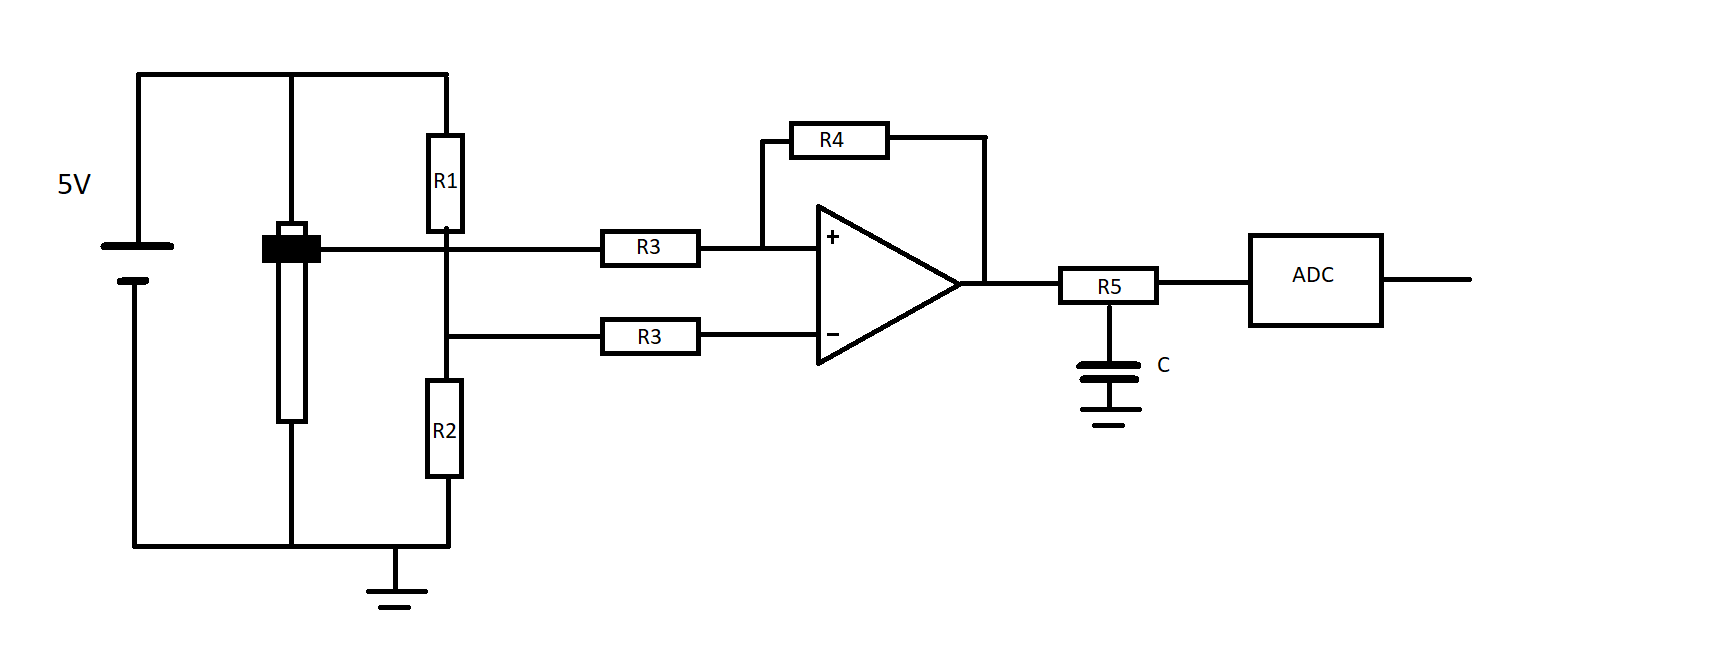
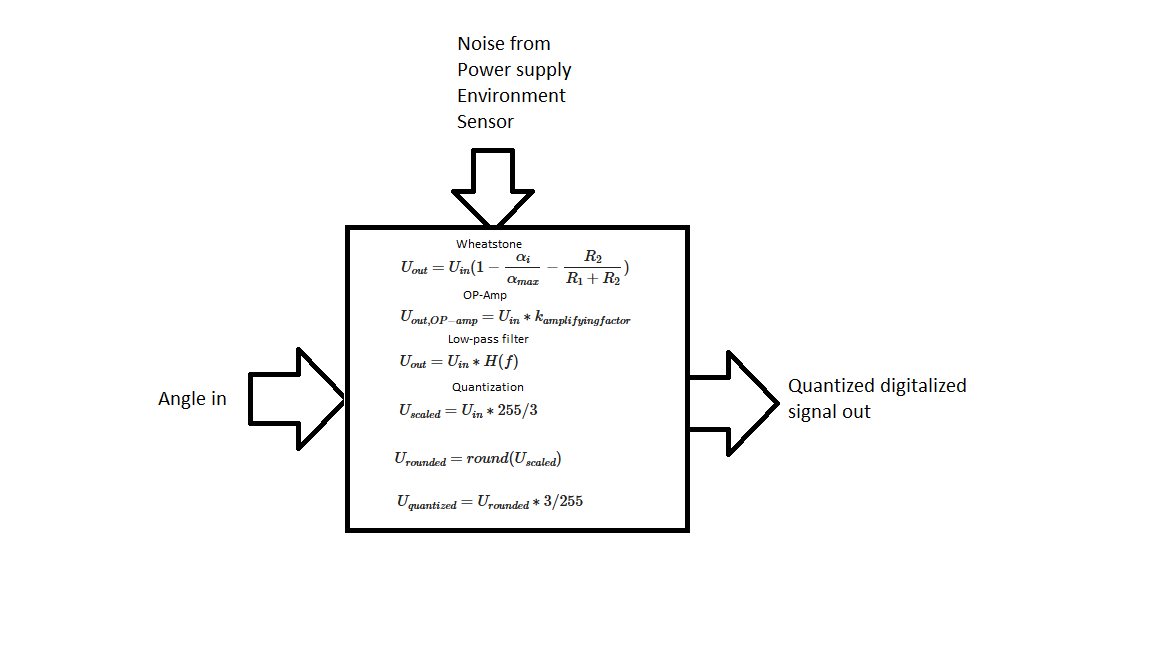


## Modeling of the sensor
This formula was derived from the Wheatstone bridge
$$
 U_{out}= U_{in} ( 1 - \frac{\alpha_{i}}{\alpha_{max}} - \frac{R_{2}}{R_{1}+R_{2}})
$$
This means that for a bigger angle $\alpha_{i}$ the smaller the $ U_{out} value is gonna be.

By looking at the gait data $ \alpha_{i} $ can be decided for the angles $ \alpha_{1} $ and $ \alpha_{2} $

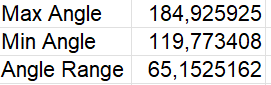

This gives an effective angle shange of about 65 degrees for the gait cycle and $ \alpha_{1} $ and $ \alpha_{2} $ were therefore decided to be $$ \alpha_{1} \approx 119$$
$$ \alpha_{2} \approx 185 $$

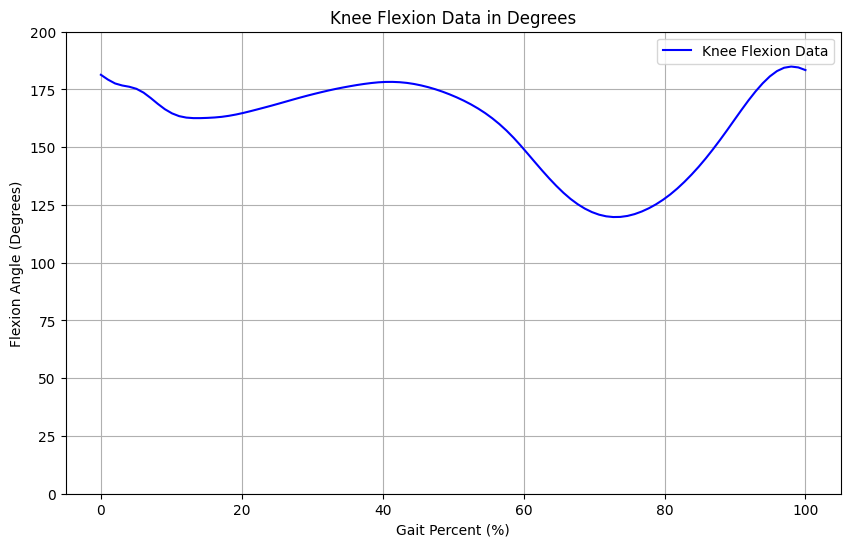

In [2]:

#File and Data Configuration
file_path = 'gait_data.xls'
sheet_name = 'Tabelle1'
column_index = 6
start_row = 1
end_row = 101
desired_max_voltage = 3

# Data Loading and Preprocessing
df = pd.read_excel(file_path, sheet_name=sheet_name)  # Load the Excel file
knee_flexion_data = df.iloc[start_row:end_row, column_index].to_numpy()  # Extract data
gait_percent = np.linspace(0, 100, len(knee_flexion_data))

# Plotting the angles given from the gait data excel sheet
plt.figure(figsize=(10, 6))
plt.plot(gait_percent, knee_flexion_data, label='Knee Flexion Data', color='b')
plt.title('Knee Flexion Data in Degrees')
plt.xlabel('Gait Percent (%)')  # Updated x-axis label
plt.ylabel('Flexion Angle (Degrees)')
plt.ylim(0, 200)  
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

Furthermore the resistor values in the Wheatstone bridge need to be decided. Since we know that the bigger the angle $\alpha_{i}$ is, the smaller the $ U_{out} $value is gonna be.
$$
 U_{out}= U_{in} ( 1 - \frac{\alpha_{2}}{\alpha_{max}} - \frac{R_{2}}{R_{1}+R_{2}}) = 0
$$

$$
 \frac{R_{2}}{R_{1}+R_{2}} = 1 - \frac{\alpha_{2}}{\alpha_{max}} = \frac{270-185}{270}
$$
 Which gives $R_{1}= 18.5k \Omega , R_{2}= 8.5k \Omega$

 This makes the output for the angle $ \alpha_{1} = 119 $ 
$$
 U_{out}= U_{in} ( 1 - \frac{\alpha_{2}}{\alpha_{max}} - \frac{R_{2}}{R_{1}+R_{2}} = 5 ( 1 - \frac{119}{270} - \frac{8.5}{8.5+18.5}) = 1.222 V
$$

In [3]:
U_in = 5  #V
R1 = 18500 #Ohm
R2 = 8500 #Ohm

#Voltage Calculation
#The calculated output voltage using the values from the knee flexion data.
U_gait = U_in * (1 - R2 / (R1 + R2) - knee_flexion_data / 270)

#The calculated output voltage using the range of values that the kneee is in during the gait
angle_min = np.min(knee_flexion_data)
angle_max = np.max(knee_flexion_data)
angles_range = np.linspace(angle_min, angle_max, 100)  # Angle range
U_range = U_in * (1 - 8500 / 27000 - angles_range / 270)  # Ideal voltage range



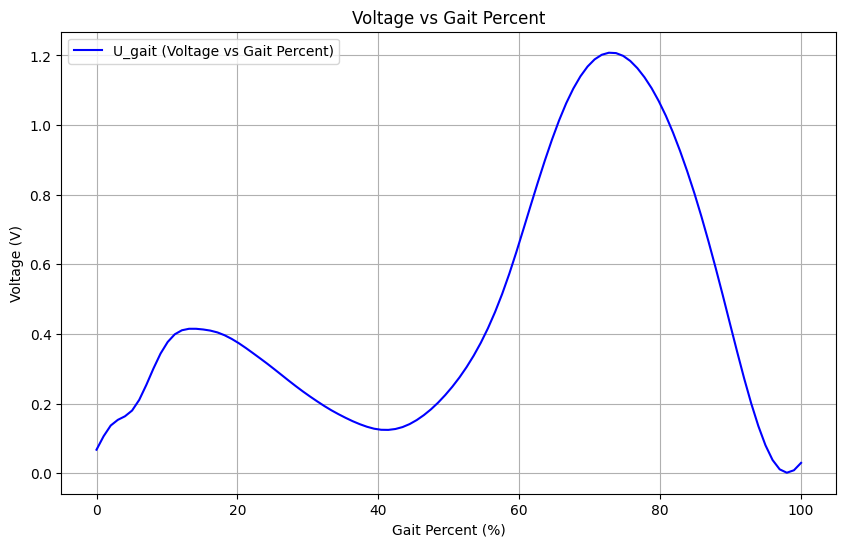

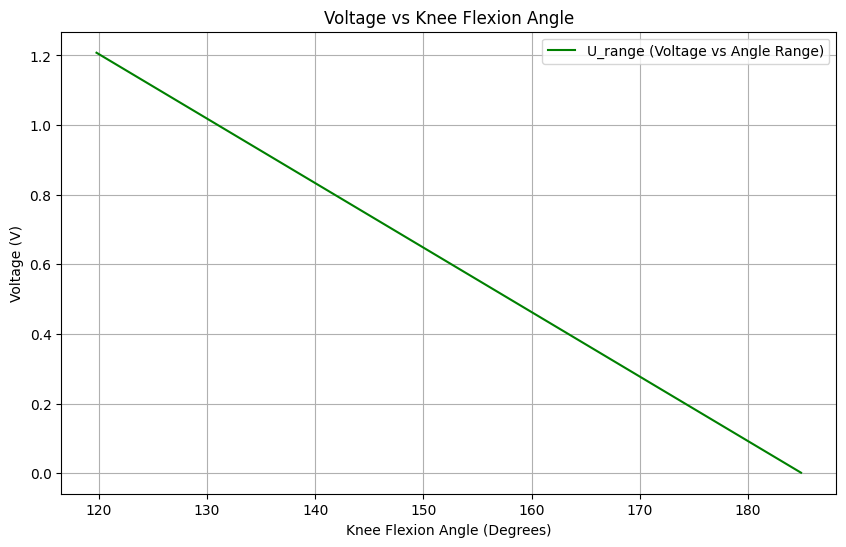

In [4]:
# Plot 1: U_gait (Voltage vs Gait Percent)
plt.figure(figsize=(10, 6))
plt.plot(gait_percent, U_gait, label='U_gait (Voltage vs Gait Percent)', color='blue')
plt.title('Voltage vs Gait Percent')
plt.xlabel('Gait Percent (%)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()

# Plot 2: U_range (Voltage vs Angle Range)
plt.figure(figsize=(10, 6))
plt.plot(angles_range, U_range, label='U_range (Voltage vs Angle Range)', color='green')
plt.title('Voltage vs Knee Flexion Angle')
plt.xlabel('Knee Flexion Angle (Degrees)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()

The Wheatstone bridge gives a voltage significantly lower than what the ADC can input (3 V). We want to amplify the Wheatstone-sensor output so that it reaches closer to 3 V, providing a more detailed knee position.

The amplifying factor is calculated as:

$$
k_{\text{amplifying factor}} = \frac{U_{\text{out, max}}}{U_{\text{ADC, in}}} \approx \frac{R4}{R3} = 2.7
$$

By using a non-inverting amplifier, a broader voltage range can be achieved:

$$
U_{out, OP-amp} = U_{in} * k_{amplifying factor} \approx U_{in} * \frac{R_4}{R_3} = U_{in}* 2.7
$$

R3 is 10000.0 Ohm
R4 is 27000 Ohm
amplification factor is 2.7


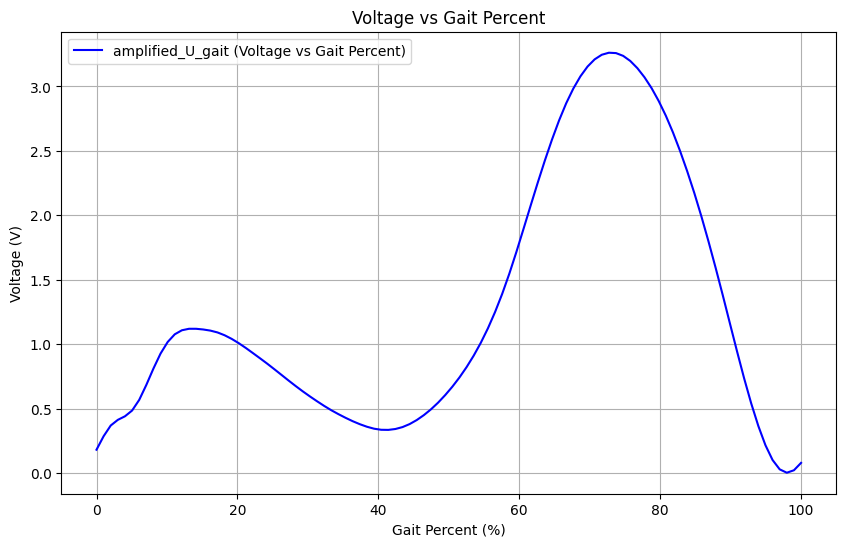

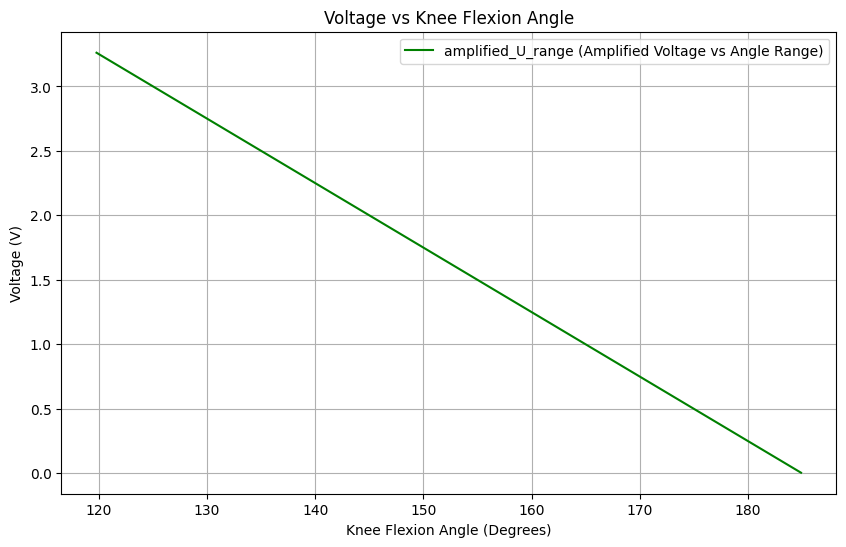

In [5]:
ADC_max_voltage = 3  # Maximum voltage range for ADC

# Amplification factor calculation
current_max_voltage = np.max(U_range)
amplification_factor = ADC_max_voltage / current_max_voltage

R3 = 10000.0 #Ohm
R4 = R3*amplification_factor/0.9 #The division by 0.9 is because of the filter step that is yet to come.
R4 = math.floor(R4/ 1000) * 1000

#The 0.9 in the denominator is because the 
amplification_factor = R4/(R3)

amplified_U_range = amplification_factor * U_range
amplified_U_gait = amplification_factor * U_gait


print('R3 is', R3 , "Ohm")
print('R4 is', R4 , "Ohm")
print('amplification factor is', amplification_factor)


# Plot 1: U_gait (Amplfied Voltage vs Gait Percent)
plt.figure(figsize=(10, 6))
plt.plot(gait_percent, amplified_U_gait, label='amplified_U_gait (Voltage vs Gait Percent)', color='blue')
plt.title('Voltage vs Gait Percent')
plt.xlabel('Gait Percent (%)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()

# Plot 2: U_range (Amplified Voltage vs Angle Range)
plt.figure(figsize=(10, 6))
plt.plot(angles_range, amplified_U_range, label='amplified_U_range (Amplified Voltage vs Angle Range)', color='green')
plt.title('Voltage vs Knee Flexion Angle')
plt.xlabel('Knee Flexion Angle (Degrees)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()

By introducing some noise to the model before the amplifier, like there is in realy life, the ADC will not get very precise values. Accounting for that we know the frequency of the noise, we can introduce a passive low pass filter to reduce the high frequency noise. 

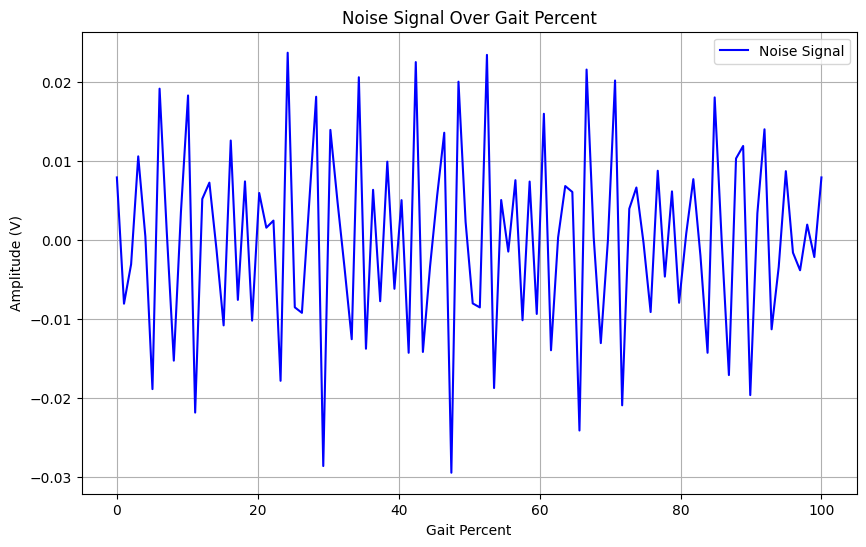

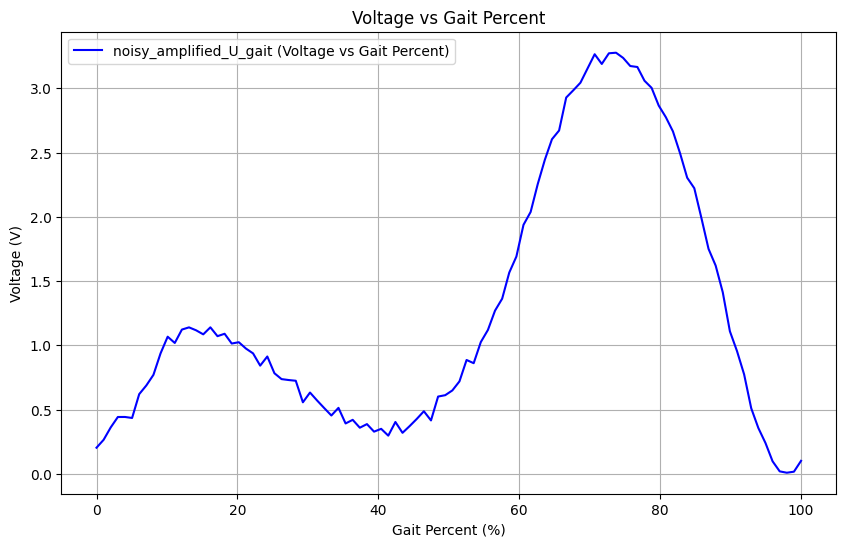

In [6]:
#Introducing the noise to the model somewhere above in form of a 50-, 66- and 170 Hz signal with each an amplitude of 0.01 V each.

#The 50Hz signal
noise50 = 0.01 * sin(50 * gait_percent * 2 * np.pi / 100 + 0.23) 
noise66 = 0.01 * sin(66 * gait_percent * 2 * np.pi / 100 + 2.54) 
noise170 = 0.01 * sin(170 * gait_percent * 2 * np.pi / 100)

noise = noise50 + noise66 + noise170

#Applying noise to output and 
noisy_amplified_U_gait = (U_gait + noise) * amplification_factor
noisy_amplified_U_range = (U_range + noise) * amplification_factor

# Plotting the noise signal
plt.figure(figsize=(10, 6))
plt.plot(gait_percent, noise, label='Noise Signal', color='b')
plt.title('Noise Signal Over Gait Percent')
plt.xlabel('Gait Percent')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()


#Noise applied to the amplified plot for gait
plt.figure(figsize=(10, 6))
plt.plot(gait_percent, noisy_amplified_U_gait, label='noisy_amplified_U_gait (Voltage vs Gait Percent)', color='blue')
plt.title('Voltage vs Gait Percent')
plt.xlabel('Gait Percent (%)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()

The average number steps per minute is between 94-105 (see link) 

[Average steps per minute](https://www.theguardian.com/lifeandstyle/2010/jan/11/walking-drills-and-pace-calculations)

$$
f= \frac{60}{105/2 (legs)} \approx 1 Hz
$$

The cutoff frequency for the filter in order to not disturub the given signal should be higher than the frequency for the knee, $f_{cutoff}=2Hz$. The resistance and capacitive values are decided by the relationship below.
$C=1 \micro F $
$$
R_{5}= \frac{1}{2 \pi \cdot f_{cutoff} \cdot C} = \frac{1}{2 \pi 2 10^{-6}} =79577.47154 \approx 80 k \Omega
$$

The output voltage from a passive low pass filter after the voltage gain shown below is:

 $$
 H(f) = \frac{U_{in}}{U_{out}} = \frac {1}{\sqrt{1+(2πfRC)^2}} 
 $$

 $$
 U_{out} = U_{in} * H(f) 
 $$



0.8934763687940478


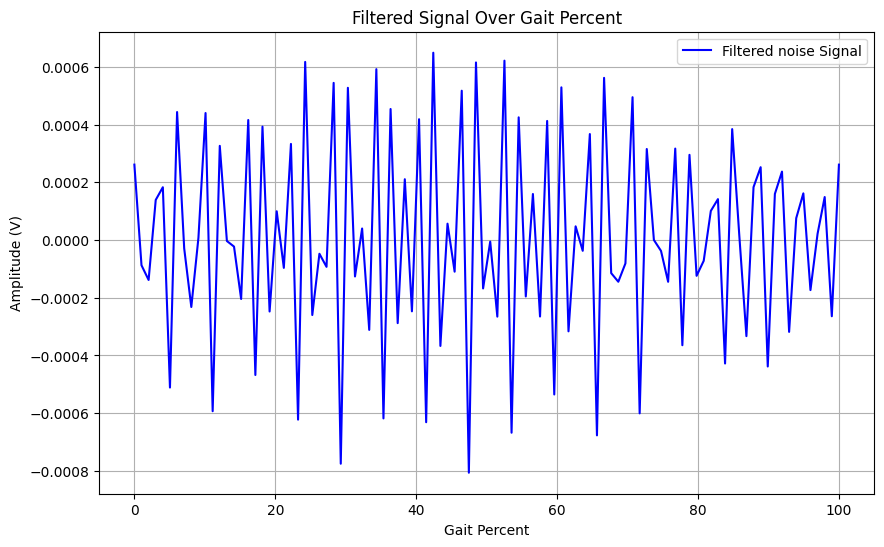

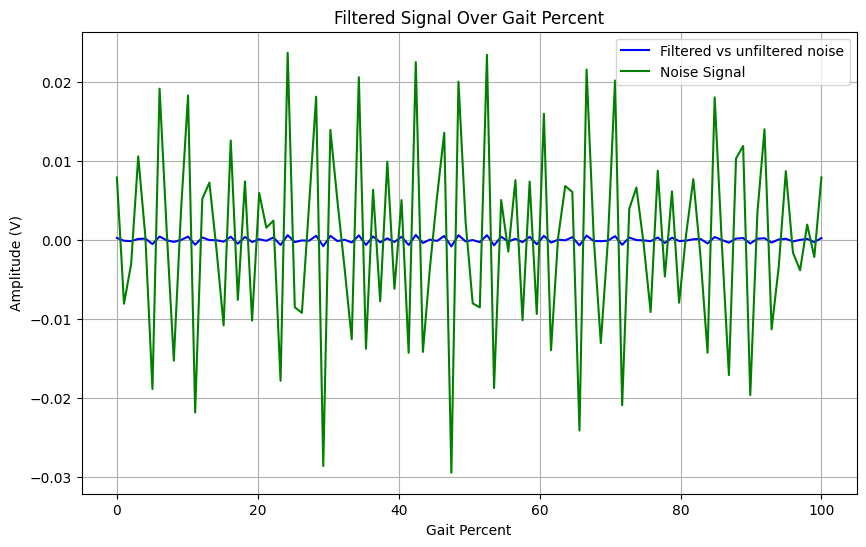

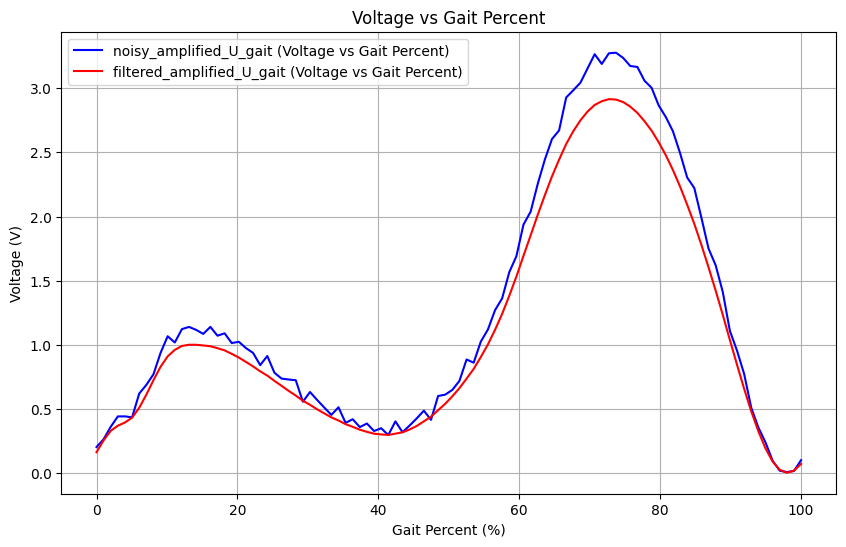

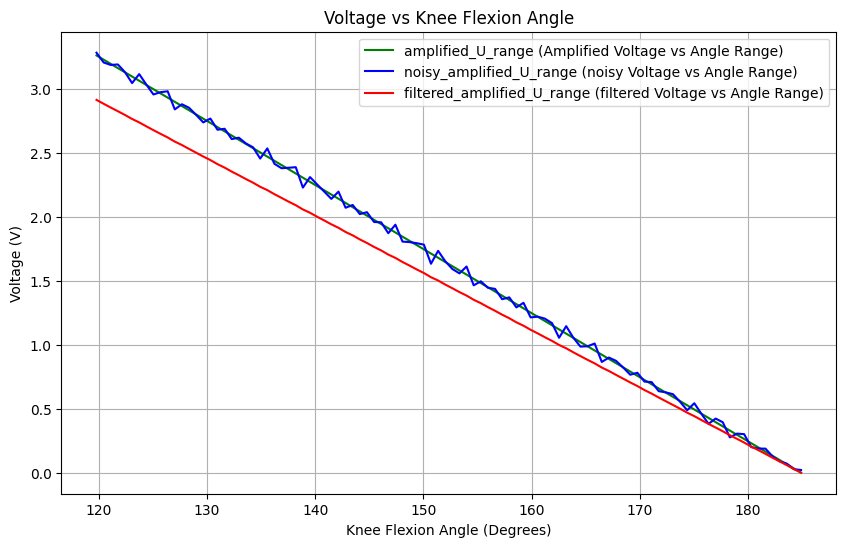

In [7]:
def H(f):
    """
    Calculate the transfer function H(f).
    Parameters:
    f : float or array-like
        Frequency in Hz.
    Returns:
    float or array-like
        The transfer function H(f).
    """
    R=80000
    C=1*10**-6
    return 1 / np.sqrt(1 + (2 * np.pi * f * R * C) ** 2)

#Noise
filtered50 = H(50)*noise50
filtered66 = H(66)*noise66
filtered170 = H(170)*noise170

filtered_noise = filtered50 + filtered66 + filtered170

print(H(1))

filtered_amplified_U_gait = (H(1)*U_gait + filtered_noise) * amplification_factor
filtered_amplified_U_range = (H(1)*U_range + filtered_noise) * amplification_factor


# Plotting the filtered signal
plt.figure(figsize=(10, 6))
plt.plot(gait_percent, filtered_noise, label='Filtered noise Signal', color='b')
plt.title('Filtered Signal Over Gait Percent')
plt.xlabel('Gait Percent')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the noise signal compared to the filtered one
plt.figure(figsize=(10, 6))
plt.plot(gait_percent, filtered_noise, label='Filtered vs unfiltered noise', color='b')
plt.plot(gait_percent, noise, label='Noise Signal', color='g')
plt.title('Filtered Signal Over Gait Percent')
plt.xlabel('Gait Percent')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()


#Filtered and unfiltered graphs in th gait plot
plt.figure(figsize=(10, 6))
plt.plot(gait_percent, noisy_amplified_U_gait, label='noisy_amplified_U_gait (Voltage vs Gait Percent)', color='blue')
plt.plot(gait_percent, filtered_amplified_U_gait, label='filtered_amplified_U_gait (Voltage vs Gait Percent)', color='red')
plt.title('Voltage vs Gait Percent')
plt.xlabel('Gait Percent (%)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()


#Unnoise and noise graphs in the angle range plot
plt.figure(figsize=(10, 6))
plt.plot(angles_range, amplified_U_range, label='amplified_U_range (Amplified Voltage vs Angle Range)', color='green')
plt.plot(angles_range, noisy_amplified_U_range, label='noisy_amplified_U_range (noisy Voltage vs Angle Range)', color='blue')
plt.plot(angles_range, filtered_amplified_U_range, label='filtered_amplified_U_range (filtered Voltage vs Angle Range)', color='red')
plt.title('Voltage vs Knee Flexion Angle')
plt.xlabel('Knee Flexion Angle (Degrees)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()


In order to be able to process the data from the angle sensor the analog output needs to be quantized to a 8 bit digital signal.

First we scale the voltage from a range of $ 0 > U > 3V$ to one of $ 0 > U > 255V$
$$ 
U_{scaled} = U_{in} * 255/3
$$
Then we round it to the nearest value digital voltage.
$$ 
U_{rounded} = round(U_{scaled}) 
$$
Finally we scale it down again to the original range and we have a quentized value. $ 0 > U > 3V$
$$ 
U_{quantized} = U_{rounded}*3/255
$$

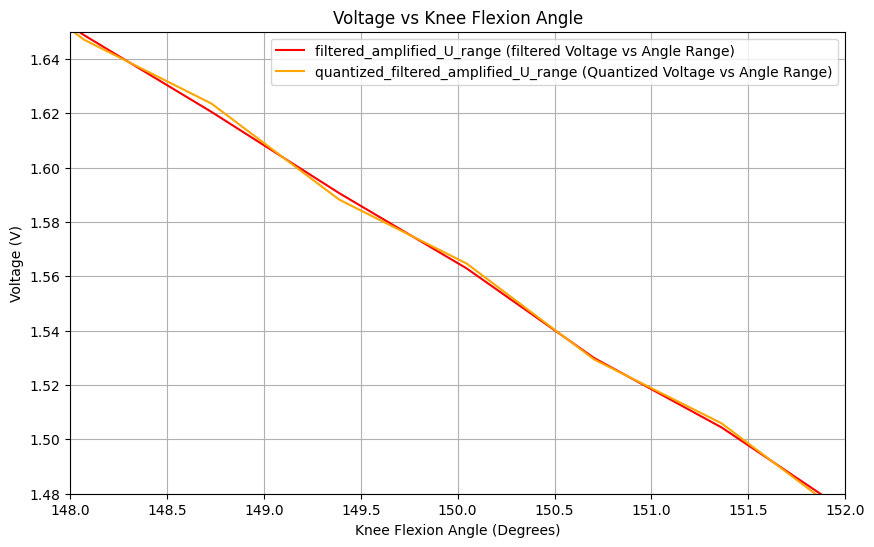

In [8]:

U_scaled = filtered_amplified_U_range * (255 / 3)  # Step 1: Scale input voltage to 8-bit range (0-255)
U_rounded = np.round(U_scaled)  # Step 2: Round to the nearest integer (quantize)
quantized_filtered_amplified_U_range = U_rounded * (3 / 255)  # Step 3: Scale back to original range (0V to 3V)

#Quantized and the filtered values in the same plot
plt.figure(figsize=(10, 6))
plt.plot(angles_range, filtered_amplified_U_range, label='filtered_amplified_U_range (filtered Voltage vs Angle Range)', color='red')
plt.plot(angles_range, quantized_filtered_amplified_U_range, label='quantized_filtered_amplified_U_range (Quantized Voltage vs Angle Range)', color='orange')
plt.title('Voltage vs Knee Flexion Angle')
plt.xlabel('Knee Flexion Angle (Degrees)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.ylim(1.48 , 1.65)  # Set x-axis limits
plt.xlim(148, 152)  # Set x-axis limits
plt.grid(True)
plt.legend()
plt.show()